Environment: The analysis described in Sesay et al (2026) was conducted in the following computational environment:
* Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

Package versions:
* scikit-learn: 1.6.1
* XGBoost: 3.1.2
* LightGBM: 4.6.0
* NumPy: 2.0.2
* pandas: 2.2.2
* Matplotlib: 3.10.0
* Seaborn: 0.13.2
* SHAP: 0.50.0

# Setup

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload CSV file
print("Please upload your CSV file:")
uploaded = files.upload()

# Get the filename from the uploaded files dictionary
filename = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Display the first 5 rows of the DataFrame
display(df.head())

Please upload your CSV file:


Saving Yld. Pred._Growth Stages.csv to Yld. Pred._Growth Stages.csv


,Growth Stage,Variety,Replication,Sample,PH,PSA,PV,DVI,RVI,RDVI,...,MSAVI2,OSAVI,EVI,NDVI,SAVI,SARE,NIRREDVI,RENDVI,RERVI,GY (g/m2)
0,Early Vegetative,CA04,1,1,0.398075,0.090470,0.035480,0.040218,2.682877,0.135563,...,0.076477,0.188105,0.102310,0.456946,0.102594,0.309880,0.381914,0.282824,1.499889,153.394989
1,Early Vegetative,CA04,1,2,0.335903,0.063807,0.028319,0.035976,2.494778,0.124046,...,0.068416,0.170954,0.091865,0.427718,0.092386,0.306685,0.351142,0.250908,1.493970,116.687628
2,Early Vegetative,CA04,1,3,0.295517,0.040446,0.006910,0.028445,2.332866,0.106657,...,0.054433,0.142762,0.072494,0.399916,0.074708,0.293427,0.331550,0.245604,1.412893,83.098534
3,Early Vegetative,CA04,1,4,0.504356,0.128830,0.046246,0.048019,3.209294,0.158756,...,0.091653,0.221490,0.122693,0.524861,0.121776,0.319797,0.448229,0.342125,1.573114,171.871615
4,Early Vegetative,CA04,1,5,0.251778,0.093716,0.006691,0.011471,1.547690,0.049659,...,0.022000,0.062366,0.029069,0.214975,0.031095,0.268398,0.170782,0.121317,1.212796,58.385372


In [ ]:
features = ['PH', 'PSA', 'PV', 'DVI', 'RVI', 'RDVI', 'MSAVI', 'MSAVI2', 'OSAVI', 'EVI', 'NDVI', 'SAVI', 'SARE', 'NIRREDVI', 'RENDVI', 'RERVI']
target = 'GY (g/m2)'

X = df[features]
y = df[target]

print("Features:")
print(X.head())
print("\nTarget:")
print(y.head())

Features:
         PH       PSA        PV       DVI       RVI      RDVI     MSAVI  \
0  0.398075  0.090470  0.035480  0.040218  2.682877  0.135563  0.235299   
1  0.335903  0.063807  0.028319  0.035976  2.494778  0.124046  0.214943   
2  0.295517  0.040446  0.006910  0.028445  2.332866  0.106657  0.182843   
3  0.504356  0.128830  0.046246  0.048019  3.209294  0.158756  0.275844   
4  0.251778  0.093716  0.006691  0.011471  1.547690  0.049659  0.082278   

     MSAVI2     OSAVI       EVI      NDVI      SAVI      SARE  NIRREDVI  \
0  0.076477  0.188105  0.102310  0.456946  0.102594  0.309880  0.381914   
1  0.068416  0.170954  0.091865  0.427718  0.092386  0.306685  0.351142   
2  0.054433  0.142762  0.072494  0.399916  0.074708  0.293427  0.331550   
3  0.091653  0.221490  0.122693  0.524861  0.121776  0.319797  0.448229   
4  0.022000  0.062366  0.029069  0.214975  0.031095  0.268398  0.170782   

     RENDVI     RERVI  
0  0.282824  1.499889  
1  0.250908  1.493970  
2  0.245604  1.4

# Correlation

Figure saved to: /content/figures/correlation_heatmap_growth_stages.png


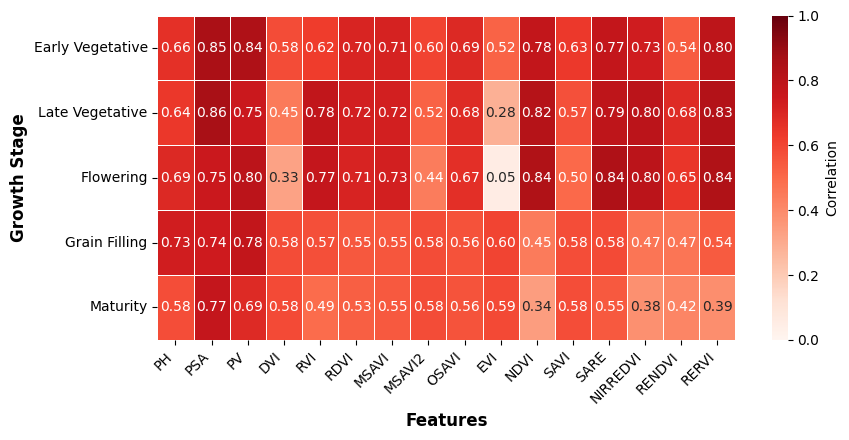

Correlation data saved to: /content/figures/correlation_values_growth_stages.csv

Correlation values:
                    PH   PSA    PV   DVI   RVI  RDVI  MSAVI  MSAVI2  OSAVI  \
Early Vegetative  0.66  0.85  0.84  0.58  0.62  0.70   0.71    0.60   0.69   
Late Vegetative   0.64  0.86  0.75  0.45  0.78  0.72   0.72    0.52   0.68   
Flowering         0.69  0.75  0.80  0.33  0.77  0.71   0.73    0.44   0.67   
Grain Filling     0.73  0.74  0.78  0.58  0.57  0.55   0.55    0.58   0.56   
Maturity          0.58  0.77  0.69  0.58  0.49  0.53   0.55    0.58   0.56   

                   EVI  NDVI  SAVI  SARE  NIRREDVI  RENDVI  RERVI  
Early Vegetative  0.52  0.78  0.63  0.77      0.73    0.54   0.80  
Late Vegetative   0.28  0.82  0.57  0.79      0.80    0.68   0.83  
Flowering         0.05  0.84  0.50  0.84      0.80    0.65   0.84  
Grain Filling     0.60  0.45  0.58  0.58      0.47    0.47   0.54  
Maturity          0.59  0.34  0.58  0.55      0.38    0.42   0.39  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Directory setup - save to Colab content directory
model_dir = '/content/models'
save_dir = '/content/figures'
os.makedirs(model_dir, exist_ok=True)
os.makedirs(save_dir, exist_ok=True)

# Define features and target
features = ['PH', 'PSA', 'PV', 'DVI', 'RVI', 'RDVI', 'MSAVI', 'MSAVI2',
            'OSAVI', 'EVI', 'NDVI', 'SAVI', 'SARE', 'NIRREDVI', 'RENDVI', 'RERVI']
target = 'GY (g/m2)'

# Get unique growth stages
unique_growth_stages = df['Growth Stage'].unique()

# Dictionary to store correlations for each growth stage
correlations = {}

# Calculate correlation for each growth stage
for stage in unique_growth_stages:
    stage_data = df[df['Growth Stage'] == stage]

    # Calculate correlations
    stage_corr = []
    for feature in features:
        if feature in stage_data.columns and target in stage_data.columns:
            # Calculate correlation excluding missing values
            valid_data = stage_data[[feature, target]].dropna()
            if len(valid_data) > 1:
                corr = valid_data[feature].corr(valid_data[target])
                stage_corr.append(corr)
            else:
                stage_corr.append(np.nan)
        else:
            stage_corr.append(np.nan)

    correlations[stage] = stage_corr

# Convert to DataFrame
corr_df = pd.DataFrame(correlations, index=features).T

# Specify growth stage order (adjust as needed)
desired_order = ['Early Vegetative', 'Late Vegetative', 'Flowering', 'Grain Filling', 'Maturity']
# Filter by order that exists in data
desired_order = [stage for stage in desired_order if stage in corr_df.index]
corr_df = corr_df.reindex(desired_order)

# Set figure size
plt.figure(figsize=(9, 4.5))

# Create heatmap
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='Reds',
            cbar_kws={'label': 'Correlation'},
            vmin=0, vmax=1.0,
            linewidths=0.5, linecolor='white')

# Set title and labels
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Growth Stage', fontsize=12, fontweight='bold')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Save figure
save_path = os.path.join(save_dir, 'correlation_heatmap_growth_stages.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Figure saved to: {save_path}")

# Display figure
plt.show()

# Save correlation dataframe
csv_path = os.path.join(save_dir, 'correlation_values_growth_stages.csv')
corr_df.to_csv(csv_path)
print(f"Correlation data saved to: {csv_path}")

# Display correlation dataframe
print("\nCorrelation values:")
print(corr_df.round(2))

# Modeling

## Nested Cross Validation

Outer: 5 folds

Inner: 3 folds

In [ ]:
import numpy as np

param_grids = {
    'Ridge Regression': {'alpha': np.logspace(-4, 0, 20)},
    'K-Nearest Neighbors': {'n_neighbors': range(1, 21)},
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [30, 50, 100]
    }
}

print(param_grids)

{'Ridge Regression': {'alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])}, 'K-Nearest Neighbors': {'n_neighbors': range(1, 21)}, 'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}, 'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}, 'LightGBM': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [30, 50, 100]}}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import pickle
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

# Directory paths - save to Colab content directory
save_dir = '/content/figures'
model_dir = '/content/models'
os.makedirs(save_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)

# Initialize dictionary to store all stage results
all_stage_results = {}

# Cross-validation settings
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Outer CV for evaluation
inner_cv = KFold(n_splits=3, shuffle=True, random_state=43)  # Inner CV for hyperparameter tuning

unique_growth_stages = df['Growth Stage'].unique()

for stage in unique_growth_stages:
    print(f"Analyzing Growth Stage: {stage}")

    # Filter data for the current growth stage
    df_stage = df[df['Growth Stage'] == stage]
    X_stage = df_stage[features]
    y_stage = df_stage[target]

    # Path for saving/loading models for this stage
    stage_model_path = os.path.join(model_dir, f'{stage}_models.pkl')

    # Check if models already exist
    if os.path.exists(stage_model_path):
        print(f"  Loading saved models for {stage}...")
        with open(stage_model_path, 'rb') as f:
            saved_data = pickle.load(f)
            stage_results = saved_data['stage_results']
            cv_fold_models = saved_data['cv_fold_models']
            best_model_name = saved_data['best_model_name']
            fold_predictions = saved_data['fold_predictions']
    else:
        stage_results = {}
        cv_fold_models = {}  # Store models from each CV fold
        best_rmse_for_stage = np.inf  # Changed: Initialize with infinity for RMSE (lower is better)
        best_model_name = None
        fold_predictions = {}

        models = {
            'Ridge Regression': Ridge(),
            'K-Nearest Neighbors': KNeighborsRegressor(),
            'Random Forest': RandomForestRegressor(random_state=42),
            'XGBoost': XGBRegressor(random_state=42, verbosity=0),
            'LightGBM': LGBMRegressor(random_state=42, verbose=-1)
        }

        for model_name, model in models.items():
            print(f"  Running Nested CV for {model_name} on {stage}...")

            # Lists to store metrics for each outer fold
            train_r2_scores = []
            test_r2_scores = []
            train_rmse_scores = []
            test_rmse_scores = []
            train_mae_scores = []
            test_mae_scores = []

            # Store predictions for each fold
            y_true_all = []
            y_pred_all = []
            best_params_list = []
            fold_models = []  # Store model from each fold

            # Outer loop: for model evaluation
            for fold_idx, (train_index, test_index) in enumerate(outer_cv.split(X_stage)):
                X_train, X_test = X_stage.iloc[train_index], X_stage.iloc[test_index]
                y_train, y_test = y_stage.iloc[train_index], y_stage.iloc[test_index]

                # Inner loop: GridSearchCV for hyperparameter tuning (only on training data)
                gscv = GridSearchCV(
                    model,
                    param_grids[model_name],
                    cv=inner_cv,  # Inner CV
                    scoring='r2',
                    n_jobs=-1,
                    verbose=0
                )

                # Fit on training data only
                gscv.fit(X_train, y_train)

                # Get the best model from this fold
                best_model_fold = gscv.best_estimator_
                best_params_list.append(gscv.best_params_)

                # Store the trained model from this fold
                fold_models.append({
                    'fold': fold_idx,
                    'model': best_model_fold,
                    'params': gscv.best_params_,
                    'train_index': train_index,
                    'test_index': test_index
                })

                # Predictions
                y_train_pred = best_model_fold.predict(X_train)
                y_test_pred = best_model_fold.predict(X_test)

                # Calculate metrics for this fold
                train_r2_scores.append(r2_score(y_train, y_train_pred))
                test_r2_scores.append(r2_score(y_test, y_test_pred))
                train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
                test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
                train_mae_scores.append(mean_absolute_error(y_train, y_train_pred))
                test_mae_scores.append(mean_absolute_error(y_test, y_test_pred))

                # Store test predictions for scatter plot
                y_true_all.extend(y_test.values)
                y_pred_all.extend(y_test_pred)

            # Calculate AVERAGE metrics across folds (instead of combined)
            avg_train_r2 = np.mean(train_r2_scores)
            avg_test_r2 = np.mean(test_r2_scores)
            avg_train_rmse = np.mean(train_rmse_scores)
            avg_test_rmse = np.mean(test_rmse_scores)
            avg_train_mae = np.mean(train_mae_scores)
            avg_test_mae = np.mean(test_mae_scores)

            stage_results[model_name] = {
                'Train R2': avg_train_r2,
                'Test R2': avg_test_r2,
                'Train RMSE': avg_train_rmse,
                'Test RMSE': avg_test_rmse,
                'Train MAE': avg_train_mae,
                'Test MAE': avg_test_mae,
                'Best Params (per fold)': best_params_list,
                'Test R2 (per fold)': test_r2_scores,
                'Train R2 (per fold)': train_r2_scores,
                'Test RMSE (per fold)': test_rmse_scores,
                'Test MAE (per fold)': test_mae_scores
            }

            # Store fold predictions
            fold_predictions[model_name] = {
                'y_true': y_true_all,
                'y_pred': y_pred_all
            }

            # Store all CV fold models for this model type
            cv_fold_models[model_name] = fold_models

            # Update best model name for the stage if current model has lower test RMSE
            if avg_test_rmse < best_rmse_for_stage:  # Changed: using RMSE (lower is better)
                best_rmse_for_stage = avg_test_rmse
                best_model_name = model_name

        # Save models and results
        print(f"  Saving all CV fold models for {stage}...")
        with open(stage_model_path, 'wb') as f:
            pickle.dump({
                'stage_results': stage_results,
                'cv_fold_models': cv_fold_models,  # Save all CV fold models
                'best_model_name': best_model_name,
                'fold_predictions': fold_predictions
            }, f)

    all_stage_results[stage] = stage_results

    # Print best model for this stage
    print(f"  Best model for {stage}: {best_model_name}")
    print(f"    Test R2: {stage_results[best_model_name]['Test R2']:.3f}")
    print(f"    Test RMSE: {stage_results[best_model_name]['Test RMSE']:.2f}")
    print(f"    Test MAE: {stage_results[best_model_name]['Test MAE']:.2f}")

print("\nAll growth stages analyzed!")

Analyzing Growth Stage: Early Vegetative
  Loading saved models for Early Vegetative...
  Best model for Early Vegetative: Ridge Regression
    Test R2: 0.690
    Test RMSE: 17.89
    Test MAE: 13.13
Analyzing Growth Stage: Late Vegetative
  Loading saved models for Late Vegetative...
  Best model for Late Vegetative: Random Forest
    Test R2: 0.704
    Test RMSE: 17.22
    Test MAE: 11.81
Analyzing Growth Stage: Flowering
  Loading saved models for Flowering...
  Best model for Flowering: Random Forest
    Test R2: 0.726
    Test RMSE: 16.71
    Test MAE: 10.91
Analyzing Growth Stage: Grain Filling
  Loading saved models for Grain Filling...
  Best model for Grain Filling: Random Forest
    Test R2: 0.698
    Test RMSE: 17.52
    Test MAE: 9.75
Analyzing Growth Stage: Maturity
  Loading saved models for Maturity...
  Best model for Maturity: Random Forest
    Test R2: 0.658
    Test RMSE: 19.29
    Test MAE: 13.04

All growth stages analyzed!


### Visualization

Creating variety-colored scatter plot for Early Vegetative...
  Fold 0: First 3 samples - Variety: ['CA04', 'CA04', 'CA04'], True: [153.3949894, 171.8716146, 28.44180871]
  Total predictions: 380
  Varieties in predictions: ['CA04' 'J027' 'J040' 'J075' 'J082' 'J100' 'Kd' 'NL6']
Creating variety-colored scatter plot for Late Vegetative...
  Fold 0: First 3 samples - Variety: ['CA04', 'CA04', 'CA04'], True: [153.3949894, 171.8716146, 28.44180871]
  Total predictions: 380
  Varieties in predictions: ['CA04' 'J027' 'J040' 'J075' 'J082' 'J100' 'Kd' 'NL6']
Creating variety-colored scatter plot for Flowering...
  Fold 0: First 3 samples - Variety: ['CA04', 'CA04', 'CA04'], True: [153.3949894, 171.8716146, 28.44180871]
  Total predictions: 380
  Varieties in predictions: ['CA04' 'J027' 'J040' 'J075' 'J082' 'J100' 'Kd' 'NL6']
Creating variety-colored scatter plot for Grain Filling...
  Fold 0: First 3 samples - Variety: ['CA04', 'CA04', 'CA04'], True: [153.3949894, 171.8716146, 28.44180871]
  T

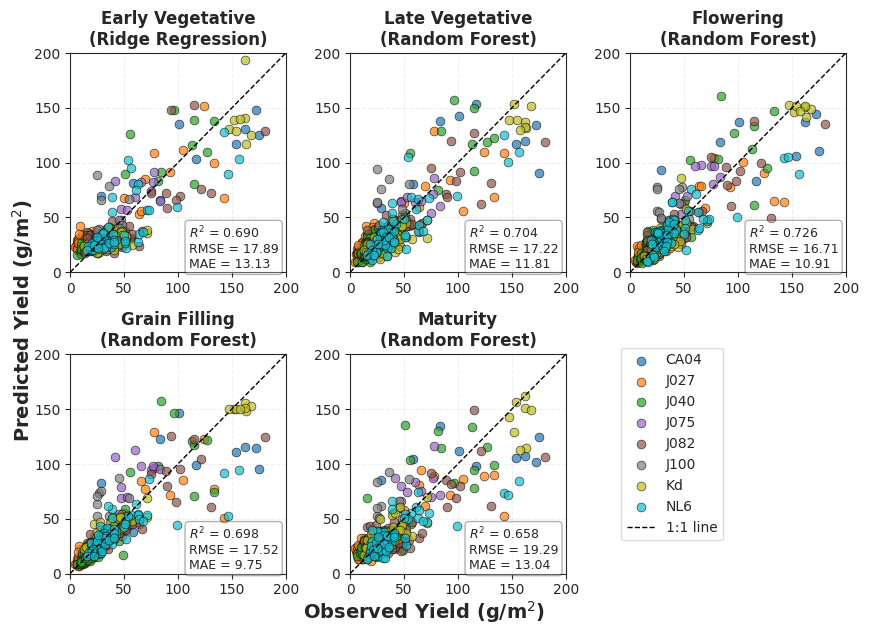


All variety-colored scatter plots created!


In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Directory paths - save to Colab content directory
save_dir = '/content/figures'
model_dir = '/content/models'
os.makedirs(save_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)

# Get unique varieties and create color palette
unique_varieties = df['Variety'].unique()
n_varieties = len(unique_varieties)

# Use a colormap for varieties
variety_colors = plt.cm.tab10(np.linspace(0, 1, n_varieties))
variety_color_dict = dict(zip(unique_varieties, variety_colors))

# Create figure with subplots: 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(9, 6.5))

# Flatten axes for easier iteration
axes_flat = axes.flatten()

for idx, stage in enumerate(unique_growth_stages):
    print(f"Creating variety-colored scatter plot for {stage}...")

    # Load saved data
    stage_model_path = os.path.join(model_dir, f'{stage}_models.pkl')
    with open(stage_model_path, 'rb') as f:
        saved_data = pickle.load(f)

    best_model_name = saved_data['best_model_name']
    cv_fold_models = saved_data['cv_fold_models'][best_model_name]
    stage_results = saved_data['stage_results'][best_model_name]

    # Get fold-wise metrics for averaging
    test_r2_folds = stage_results['Test R2 (per fold)']
    test_rmse_folds = stage_results['Test RMSE (per fold)']
    test_mae_folds = stage_results['Test MAE (per fold)']

    # Calculate average metrics
    avg_r2 = np.mean(test_r2_folds)
    avg_rmse = np.mean(test_rmse_folds)
    avg_mae = np.mean(test_mae_folds)

    # Prepare data for plotting
    df_stage = df[df['Growth Stage'] == stage].reset_index(drop=True)  # Reset index to ensure alignment
    X_stage = df_stage[features].reset_index(drop=True)
    y_stage = df_stage[target].reset_index(drop=True)
    varieties_stage = df_stage['Variety'].reset_index(drop=True)

    # Select the appropriate subplot
    ax = axes_flat[idx]

    # Store data with verification
    data_points = []

    # Plot each fold
    for fold_data in cv_fold_models:
        fold_idx = fold_data['fold']
        model = fold_data['model']
        test_index = fold_data['test_index']

        # Get test data for this fold using iloc (since we reset_index)
        X_test = X_stage.iloc[test_index]
        y_test = y_stage.iloc[test_index]
        varieties_test = varieties_stage.iloc[test_index]

        # Make predictions
        y_pred = model.predict(X_test)

        # Verify the data alignment by storing as structured data
        for i, (true_val, pred_val, variety) in enumerate(zip(y_test.values, y_pred, varieties_test.values)):
            data_points.append({
                'fold': fold_idx,
                'original_index': test_index[i],
                'y_true': true_val,
                'y_pred': pred_val,
                'variety': variety
            })

        # Print verification for first fold
        if fold_idx == 0:
            print(f"  Fold {fold_idx}: First 3 samples - Variety: {varieties_test.iloc[:3].tolist()}, True: {y_test.iloc[:3].tolist()}")

    # Convert to DataFrame for easy manipulation
    df_predictions = pd.DataFrame(data_points)

    # Print verification
    print(f"  Total predictions: {len(df_predictions)}")
    print(f"  Varieties in predictions: {df_predictions['variety'].unique()}")

    # Plot by variety
    for variety in unique_varieties:
        variety_data = df_predictions[df_predictions['variety'] == variety]
        if len(variety_data) > 0:  # Only plot if there are samples for this variety
            ax.scatter(variety_data['y_true'], variety_data['y_pred'],
                       alpha=0.7,
                       color=variety_color_dict[variety],
                       edgecolors='k',
                       linewidth=0.5,
                       s=40,
                       label=variety)

    # Add 1:1 line
    ax.plot([0, 200], [0, 200],
            'k--', linewidth=1, label='1:1 line', zorder=10)

    # Set axis limits to 0-200
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 200)

    # Title for each subplot with algorithm name in parentheses
    ax.set_title(f'{stage}\n({best_model_name})', fontsize=12, fontweight='bold')

    # Add metrics text box
    textstr = f'$R^2$ = {avg_r2:.3f}\nRMSE = {avg_rmse:.2f}\nMAE = {avg_mae:.2f}'
    ax.text(0.55, 0.22, textstr,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.3, edgecolor='black'))

    # Grid
    ax.grid(True, alpha=0.3, linestyle='--')

    # Remove individual axis labels (will add common ones later)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Remove individual legends (will add a common one later)
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Hide the last subplot (position 5, since we only have 5 stages)
axes_flat[5].axis('off')

# Add common Y-axis label in the middle of the left side
fig.text(0.04, 0.5, 'Predicted Yield (g/m$^{2}$)',
         va='center', rotation='vertical', fontsize=14, fontweight='bold')

# Add common X-axis label in the middle of the bottom
fig.text(0.5, 0.04, 'Observed Yield (g/m$^{2}$)',
         ha='center', fontsize=14, fontweight='bold')

# Create a common legend outside the plot area (bottom right) with transparency
# Get handles and labels from the first subplot
handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.84, 0.15),
           fontsize=10, framealpha=0.7, frameon=True, ncol=1)

plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Adjust layout to make room for common labels

# Save combined figure
save_path = os.path.join(save_dir, 'scatter_variety_colored_all_stages.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f'Variety-colored scatter plot saved to: {save_path}')

plt.show()

print("\nAll variety-colored scatter plots created!")

Figure saved to: /content/figures/model_performance_comparison_with_mean.png

Best performing stages:

R2:
  Test: Flowering
  Train: Grain Filling

RMSE:
  Test: Flowering
  Train: Grain Filling

MAE:
  Test: Grain Filling
  Train: Grain Filling


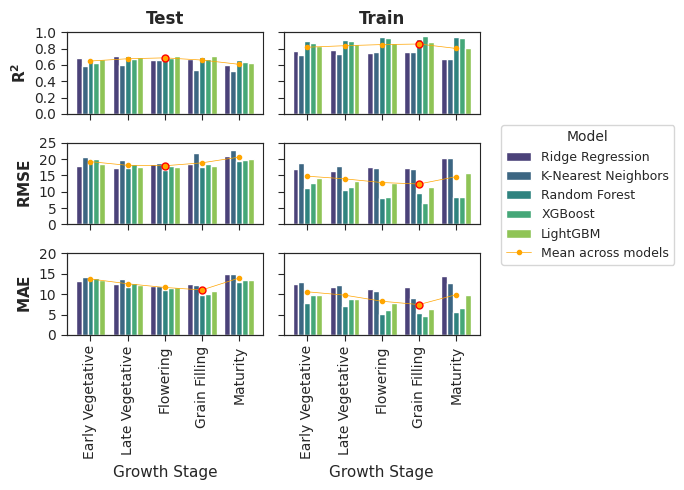


Performance data saved to: /content/figures/model_performance_data.csv
Mean performance data saved to: /content/figures/model_performance_mean_data.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle

# Directory paths - save to Colab content directory
model_dir = '/content/models'
save_dir = '/content/figures'
os.makedirs(save_dir, exist_ok=True)

# Load all stage results from saved models
all_stage_results = {}

unique_growth_stages = df['Growth Stage'].unique()

for stage in unique_growth_stages:
    stage_model_path = os.path.join(model_dir, f'{stage}_models.pkl')

    if os.path.exists(stage_model_path):
        with open(stage_model_path, 'rb') as f:
            saved_data = pickle.load(f)
            all_stage_results[stage] = saved_data['stage_results']

# Convert the all_stage_results dictionary to a more suitable format for plotting
plot_data = []
for stage, models_results in all_stage_results.items():
    for model_name, metrics in models_results.items():
        for metric_name in ['R2', 'RMSE', 'MAE']:
            # Use averaged values from fold-wise metrics
            train_key = f'Train {metric_name} (per fold)'
            test_key = f'Test {metric_name} (per fold)'

            # Calculate average if per-fold data exists, otherwise use existing values
            if train_key in metrics and test_key in metrics:
                train_value = np.mean(metrics[train_key])
                test_value = np.mean(metrics[test_key])
            else:
                # Fallback to existing values (already averaged in the new code)
                train_value = metrics[f'Train {metric_name}']
                test_value = metrics[f'Test {metric_name}']

            plot_data.append({
                'Growth Stage': stage,
                'Model': model_name,
                'Metric': metric_name,
                'Train Value': train_value,
                'Test Value': test_value
            })

plot_df = pd.DataFrame(plot_data)

# Calculate mean values across models for each growth stage
mean_data = []
for stage in plot_df['Growth Stage'].unique():
    for metric in ['R2', 'RMSE', 'MAE']:
        stage_metric_data = plot_df[(plot_df['Growth Stage'] == stage) &
                                     (plot_df['Metric'] == metric)]
        mean_data.append({
            'Growth Stage': stage,
            'Metric': metric,
            'Train Mean': stage_metric_data['Train Value'].mean(),
            'Test Mean': stage_metric_data['Test Value'].mean()
        })

mean_df = pd.DataFrame(mean_data)

# Find best performing stages for each metric
best_stages = {}
for metric in ['R2', 'RMSE', 'MAE']:
    metric_data = mean_df[mean_df['Metric'] == metric]
    if metric == 'R2':
        # For R2, higher is better
        best_stages[metric] = {
            'Test': metric_data.loc[metric_data['Test Mean'].idxmax(), 'Growth Stage'],
            'Train': metric_data.loc[metric_data['Train Mean'].idxmax(), 'Growth Stage']
        }
    else:
        # For RMSE and MAE, lower is better
        best_stages[metric] = {
            'Test': metric_data.loc[metric_data['Test Mean'].idxmin(), 'Growth Stage'],
            'Train': metric_data.loc[metric_data['Train Mean'].idxmin(), 'Growth Stage']
        }

# Set style
sns.set_style("ticks")
plt.rcParams['font.size'] = 10

# Define y-axis limits and ticks for each metric
y_limits = {
    'R2': (0, 1),
    'RMSE': (0, 25),
    'MAE': (0, 20)
}

y_ticks = {
    'R2': [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'RMSE': [0, 5, 10, 15, 20, 25],
    'MAE': [0, 5, 10, 15, 20]
}

# Create subplots for all metrics
fig, axes = plt.subplots(3, 2, figsize=(5, 5))

# Store handles and labels for legend
handles, labels = None, None

for idx, metric in enumerate(['R2', 'RMSE', 'MAE']):
    # Format metric name for display
    if metric == 'R2':
        display_metric = r'$\mathbf{R^2}$'
    elif metric == 'RMSE':
        display_metric = r'$\mathbf{RMSE}$'
    else:  # MAE
        display_metric = r'$\mathbf{MAE}$'

    # Get mean data for this metric
    mean_metric = mean_df[mean_df['Metric'] == metric]
    stages = mean_metric['Growth Stage'].values

    # Get best stage for this metric
    best_stage_test = best_stages[metric]['Test']
    best_stage_train = best_stages[metric]['Train']

    # Test plot (left column)
    sns.barplot(data=plot_df[plot_df['Metric'] == metric],
                x='Growth Stage', y='Test Value', hue='Model',
                palette='viridis', ax=axes[idx, 0])

    # Overlay line plot for mean with highlighted best stage
    ax2 = axes[idx, 0].twinx()

    # Plot all points in orange
    ax2.plot(range(len(mean_metric)), mean_metric['Test Mean'].values,
             color='orange', marker='o', linewidth=0.5, markersize=3,
             label='Mean across models', zorder=10)

    # Highlight best stage in red with larger marker
    best_idx_test = list(stages).index(best_stage_test)
    ax2.plot(best_idx_test, mean_metric.iloc[best_idx_test]['Test Mean'],
             marker='o', markersize=5, color='orange',
             markeredgecolor='red', markeredgewidth=1,
             zorder=11, linestyle='none')

    ax2.set_ylim(y_limits[metric])
    ax2.set_yticks([])
    ax2.spines['right'].set_visible(False)

    # Get legend handles and labels from first plot
    if idx == 0:
        handles, labels = axes[idx, 0].get_legend_handles_labels()
        # Add line plot handle
        line_handle = ax2.get_legend_handles_labels()[0][0]
        handles.append(line_handle)
        labels.append('Mean across models')

    # Remove individual legends
    axes[idx, 0].get_legend().remove()

    axes[idx, 0].set_ylabel(f'{display_metric}', fontsize=11, fontweight='bold')
    axes[idx, 0].set_ylim(y_limits[metric])
    axes[idx, 0].set_yticks(y_ticks[metric])
    axes[idx, 0].tick_params(axis='both', direction='out', which='both', length=4)
    axes[idx, 0].spines['top'].set_visible(True)
    axes[idx, 0].spines['right'].set_visible(True)

    # Add "Test" title only to the top left subplot
    if idx == 0:
        axes[idx, 0].set_title('Test', fontsize=12, fontweight='bold')

    # Remove x-axis labels for top and middle rows
    if idx < 2:
        axes[idx, 0].set_xlabel('')
        axes[idx, 0].set_xticklabels([])
    else:
        axes[idx, 0].set_xlabel('Growth Stage', fontsize=11)
        axes[idx, 0].tick_params(axis='x', rotation=90)

    # Train plot (right column)
    sns.barplot(data=plot_df[plot_df['Metric'] == metric],
                x='Growth Stage', y='Train Value', hue='Model',
                palette='viridis', ax=axes[idx, 1])

    # Overlay line plot for mean with highlighted best stage
    ax2_train = axes[idx, 1].twinx()

    # Plot all points in orange
    ax2_train.plot(range(len(mean_metric)), mean_metric['Train Mean'].values,
                   color='orange', marker='o', linewidth=0.5, markersize=3,
                   zorder=10)

    # Highlight best stage in red with larger marker
    best_idx_train = list(stages).index(best_stage_train)
    ax2_train.plot(best_idx_train, mean_metric.iloc[best_idx_train]['Train Mean'],
                   marker='o', markersize=5, color='orange',
                   markeredgecolor='red', markeredgewidth=1,
                   zorder=11, linestyle='none')

    ax2_train.set_ylim(y_limits[metric])
    ax2_train.set_yticks([])
    ax2_train.spines['right'].set_visible(False)

    # Remove individual legends
    axes[idx, 1].get_legend().remove()

    axes[idx, 1].set_ylabel('', fontsize=11)
    axes[idx, 1].set_ylim(y_limits[metric])
    axes[idx, 1].set_yticks(y_ticks[metric])
    axes[idx, 1].set_yticklabels([])
    axes[idx, 1].tick_params(axis='both', direction='out', which='both', length=4)
    axes[idx, 1].spines['top'].set_visible(True)
    axes[idx, 1].spines['right'].set_visible(True)

    # Add "Train" title only to the top right subplot
    if idx == 0:
        axes[idx, 1].set_title('Train', fontsize=12, fontweight='bold')

    # Remove x-axis labels for top and middle rows
    if idx < 2:
        axes[idx, 1].set_xlabel('')
        axes[idx, 1].set_xticklabels([])
    else:
        axes[idx, 1].set_xlabel('Growth Stage', fontsize=11)
        axes[idx, 1].tick_params(axis='x', rotation=90)

# Add single legend outside the plot
if handles and labels:
    fig.legend(handles, labels, title='Model', loc='center left',
               bbox_to_anchor=(1.0, 0.6), frameon=True, fontsize=9)

plt.tight_layout()

# Save figure to Colab content directory
save_path = os.path.join(save_dir, 'model_performance_comparison_with_mean.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f'Figure saved to: {save_path}')

# Print best performing stages
print("\nBest performing stages:")
for metric in ['R2', 'RMSE', 'MAE']:
    print(f"\n{metric}:")
    print(f"  Test: {best_stages[metric]['Test']}")
    print(f"  Train: {best_stages[metric]['Train']}")

plt.show()

# Also save the performance data as CSV
csv_path = os.path.join(save_dir, 'model_performance_data.csv')
plot_df.to_csv(csv_path, index=False)

# Save mean data as CSV
mean_csv_path = os.path.join(save_dir, 'model_performance_mean_data.csv')
mean_df.to_csv(mean_csv_path, index=False)
print(f'\nPerformance data saved to: {csv_path}')
print(f'Mean performance data saved to: {mean_csv_path}')

## SHAP

Calculating SHAP values for Growth Stage: Early Vegetative
  Best model: Ridge Regression
  Processing Fold 0...


PermutationExplainer explainer: 305it [00:13,  9.23it/s]                         


  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed SHAP calculation for Early Vegetative

Calculating SHAP values for Growth Stage: Late Vegetative
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed SHAP calculation for Late Vegetative

Calculating SHAP values for Growth Stage: Flowering
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed SHAP calculation for Flowering

Calculating SHAP values for Growth Stage: Grain Filling
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed SHAP calculation for Grain Filling

Calculating SHAP values for Growth Stage: Maturity
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 

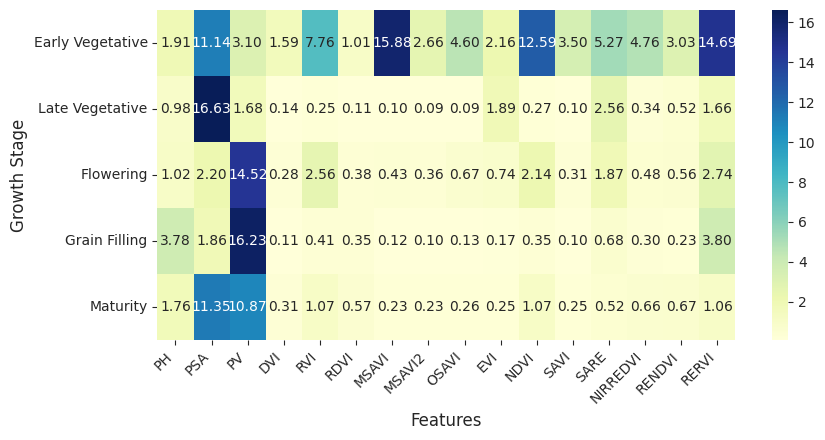

SHAP values saved to: /content/figures/mean_abs_shap_values.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shap
import os
import pickle

# Directory paths - save to Colab content directory
model_dir = '/content/models'
save_dir = '/content/figures'
os.makedirs(save_dir, exist_ok=True)

# Dictionary to store mean absolute SHAP values for each stage and feature
mean_abs_shap_values = {}

unique_growth_stages = df['Growth Stage'].unique()

for stage in unique_growth_stages:
    print(f"Calculating SHAP values for Growth Stage: {stage}")

    # Filter data for the current growth stage
    df_stage = df[df['Growth Stage'] == stage]
    X_stage = df_stage[features]
    y_stage = df_stage[target]

    # Load saved models for this stage
    stage_model_path = os.path.join(model_dir, f'{stage}_models.pkl')

    with open(stage_model_path, 'rb') as f:
        saved_data = pickle.load(f)
        best_model_name = saved_data['best_model_name']
        cv_fold_models = saved_data['cv_fold_models'][best_model_name]

    print(f"  Best model: {best_model_name}")

    # Store SHAP values from each fold
    all_fold_shap_values = []

    # Calculate SHAP values for each CV fold
    for fold_info in cv_fold_models:
        fold_idx = fold_info['fold']
        model = fold_info['model']
        train_index = fold_info['train_index']

        print(f"  Processing Fold {fold_idx}...")

        # Get training data for this fold
        X_train_fold = X_stage.iloc[train_index]

        # Create SHAP explainer based on model type
        if best_model_name in ['Random Forest', 'XGBoost', 'LightGBM']:
            explainer = shap.TreeExplainer(model)
            shap_values_fold = explainer.shap_values(X_train_fold)
        else:
            # Use a sample of the training data as background for non-tree models
            background_data = X_train_fold.sample(min(100, len(X_train_fold)), random_state=42)
            explainer = shap.Explainer(model.predict, background_data)
            shap_values_fold = explainer(X_train_fold).values

        # Handle different SHAP value formats
        if isinstance(shap_values_fold, list):
            shap_values_fold = shap_values_fold[0]

        # Calculate mean absolute SHAP values for this fold
        mean_abs_fold_shap = np.mean(np.abs(shap_values_fold), axis=0)
        all_fold_shap_values.append(mean_abs_fold_shap)

    # Average SHAP values across all folds
    avg_shap_across_folds = np.mean(all_fold_shap_values, axis=0)

    # Store in dictionary
    mean_abs_shap_values[stage] = dict(zip(features, avg_shap_across_folds))

    print(f"  Completed SHAP calculation for {stage}\n")

# Convert the dictionary to a pandas DataFrame for the heatmap
mean_abs_shap_df = pd.DataFrame.from_dict(mean_abs_shap_values, orient='index')

# Plot the heatmap
plt.figure(figsize=(9, 4.5))
sns.heatmap(mean_abs_shap_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Growth Stage", fontsize=12)
#plt.title("Mean Absolute SHAP Values (Averaged across 5-fold CV)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure to Colab content directory
save_path = os.path.join(save_dir, 'shap_values_heatmap_nested_cv.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f'SHAP heatmap saved to: {save_path}')

plt.show()

# Also save the SHAP values DataFrame as CSV for reference
csv_path = os.path.join(save_dir, 'mean_abs_shap_values.csv')
mean_abs_shap_df.to_csv(csv_path)
print(f'SHAP values saved to: {csv_path}')

## Permutation Importance

Calculating Permutation Importance for Growth Stage: Early Vegetative
  Best model: Ridge Regression
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed Permutation Importance calculation for Early Vegetative

Calculating Permutation Importance for Growth Stage: Late Vegetative
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed Permutation Importance calculation for Late Vegetative

Calculating Permutation Importance for Growth Stage: Flowering
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  Processing Fold 3...
  Processing Fold 4...
  Completed Permutation Importance calculation for Flowering

Calculating Permutation Importance for Growth Stage: Grain Filling
  Best model: Random Forest
  Processing Fold 0...
  Processing Fold 1...
  Processing Fold 2...
  P

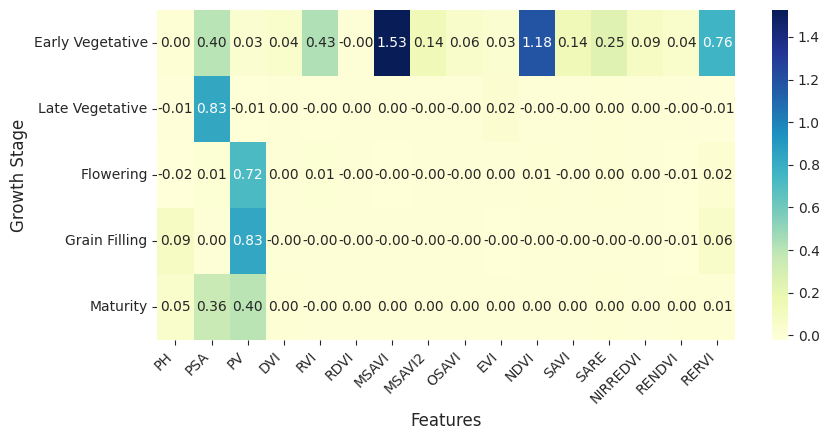

Permutation Importance values saved to: /content/figures/mean_permutation_importance.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.inspection import permutation_importance

# Directory paths - save to Colab content directory
model_dir = '/content/models'
save_dir = '/content/figures'
os.makedirs(save_dir, exist_ok=True)

# Dictionary to store mean permutation importance values for each stage and feature
mean_perm_importance = {}

unique_growth_stages = df['Growth Stage'].unique()

for stage in unique_growth_stages:
    print(f"Calculating Permutation Importance for Growth Stage: {stage}")

    # Filter data for the current growth stage
    df_stage = df[df['Growth Stage'] == stage]
    X_stage = df_stage[features]
    y_stage = df_stage[target]

    # Load saved models for this stage
    stage_model_path = os.path.join(model_dir, f'{stage}_models.pkl')

    with open(stage_model_path, 'rb') as f:
        saved_data = pickle.load(f)
        best_model_name = saved_data['best_model_name']
        cv_fold_models = saved_data['cv_fold_models'][best_model_name]

    print(f"  Best model: {best_model_name}")

    # Store permutation importance from each fold
    all_fold_perm_importance = []

    # Calculate permutation importance for each CV fold
    for fold_info in cv_fold_models:
        fold_idx = fold_info['fold']
        model = fold_info['model']
        test_index = fold_info['test_index']

        print(f"  Processing Fold {fold_idx}...")

        # Get test data for this fold
        X_test_fold = X_stage.iloc[test_index]
        y_test_fold = y_stage.iloc[test_index]

        # Calculate permutation importance on test set
        perm_importance = permutation_importance(
            model,
            X_test_fold,
            y_test_fold,
            n_repeats=10,
            random_state=42,
            scoring='r2'
        )

        # Store mean importance for this fold
        all_fold_perm_importance.append(perm_importance.importances_mean)

    # Average permutation importance across all folds
    avg_perm_importance_across_folds = np.mean(all_fold_perm_importance, axis=0)

    # Store in dictionary
    mean_perm_importance[stage] = dict(zip(features, avg_perm_importance_across_folds))

    print(f"  Completed Permutation Importance calculation for {stage}\n")

# Convert the dictionary to a pandas DataFrame for the heatmap
mean_perm_importance_df = pd.DataFrame.from_dict(mean_perm_importance, orient='index')

# Plot the heatmap
plt.figure(figsize=(9, 4.5))
sns.heatmap(mean_perm_importance_df, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel("Features", fontsize=12)
plt.ylabel("Growth Stage", fontsize=12)
#plt.title("Mean Permutation Importance (Averaged across 5-fold CV)", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save figure to Colab content directory
save_path = os.path.join(save_dir, 'permutation_importance_heatmap_nested_cv.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f'Permutation Importance heatmap saved to: {save_path}')

plt.show()

# Also save the Permutation Importance values DataFrame as CSV for reference
csv_path = os.path.join(save_dir, 'mean_permutation_importance.csv')
mean_perm_importance_df.to_csv(csv_path)
print(f'Permutation Importance values saved to: {csv_path}')

### Visualization

Combined feature importance figure saved to: /content/figures/combined_feature_importance.png


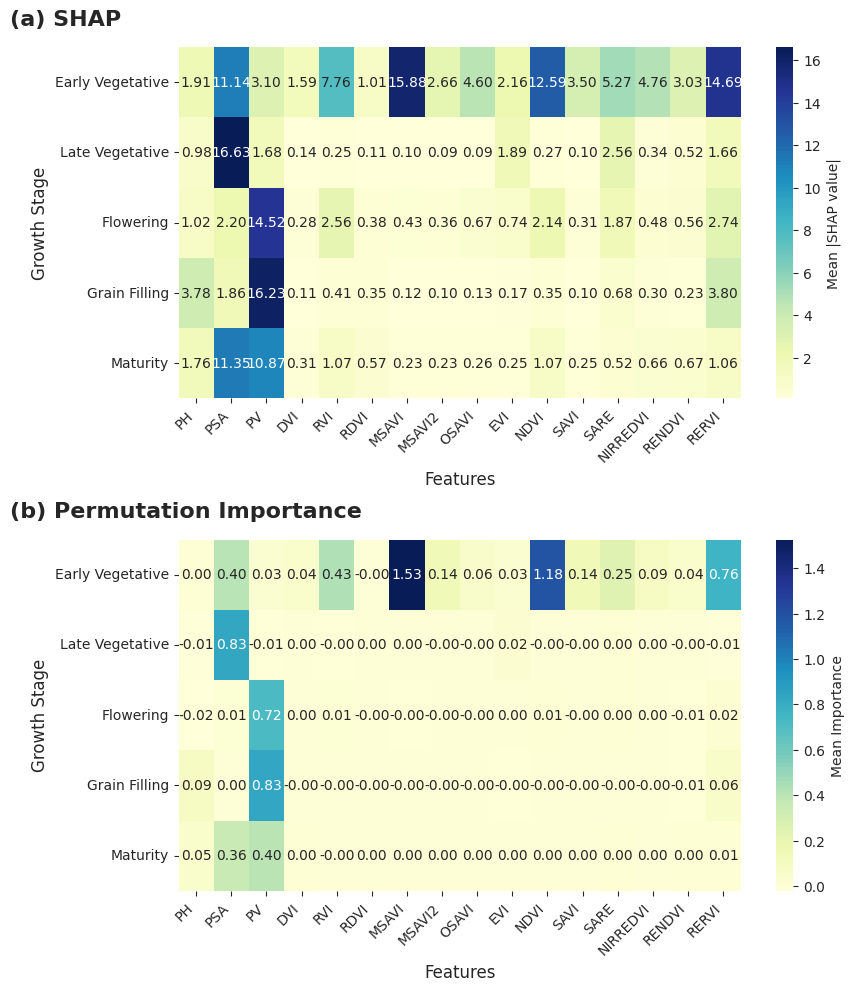

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create figure with 2 subplots vertically stacked
fig, axes = plt.subplots(2, 1, figsize=(9, 10))

# (a) SHAP values heatmap
sns.heatmap(mean_abs_shap_df, annot=True, cmap="YlGnBu", fmt=".2f", ax=axes[0], cbar_kws={'label': 'Mean |SHAP value|'})
axes[0].set_xlabel("Features", fontsize=12)
axes[0].set_ylabel("Growth Stage", fontsize=12)
axes[0].text(-0.3, 1.05, "(a) SHAP", fontsize=16, fontweight='bold',
             transform=axes[0].transAxes, ha='left', va='bottom')
axes[0].tick_params(axis='x', rotation=45)
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

# (b) Permutation Importance heatmap
sns.heatmap(mean_perm_importance_df, annot=True, cmap="YlGnBu", fmt=".2f", ax=axes[1], cbar_kws={'label': 'Mean Importance'})
axes[1].set_xlabel("Features", fontsize=12)
axes[1].set_ylabel("Growth Stage", fontsize=12)
axes[1].text(-0.3, 1.05, "(b) Permutation Importance", fontsize=16, fontweight='bold',
             transform=axes[1].transAxes, ha='left', va='bottom')
axes[1].tick_params(axis='x', rotation=45)
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout with more spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()

# Save the combined figure
save_path = os.path.join(save_dir, 'combined_feature_importance.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f'Combined feature importance figure saved to: {save_path}')

plt.show()